```{contents}
```

# Cost Functions

A **cost function** measures how well a regression line fits the data. It calculates the error (difference between predicted and actual values).
The **goal** is to find parameters ($\theta_0, \theta_1, ...$) that **minimize** this cost.

---

## Mean Squared Error (MSE)

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2
$$

* **Most common cost function** for linear regression.
* Squares the errors → **penalizes large errors heavily**.
* Smooth and differentiable → great for gradient descent.

✅ Pros:

* Convex function → guarantees global minimum.
* Emphasizes large errors (good for minimizing outliers’ impact in general trend fitting).

❌ Cons:

* **Sensitive to outliers** → a single extreme point can distort results.

---

## Mean Absolute Error (MAE)

$$
J(\theta) = \frac{1}{m} \sum_{i=1}^m |h_\theta(x^{(i)}) - y^{(i)}|
$$

* Takes absolute differences instead of squaring.
* Errors are treated equally (linear penalty).

✅ Pros:

* **Robust to outliers** (doesn’t blow up error).
* Simple interpretation (average error in same units as data).

❌ Cons:

* Not differentiable at zero (gradient descent is trickier, though solvable with subgradients).
* Optimization can be slower.

---

## Huber Loss (Combination of MSE and MAE)

$$
J(\theta) =
\begin{cases} 
\frac{1}{2}(h_\theta(x) - y)^2 & \text{if } |h_\theta(x) - y| \leq \delta \\
\delta \cdot |h_\theta(x) - y| - \frac{1}{2}\delta^2 & \text{otherwise}
\end{cases}
$$

* Uses **MSE for small errors** (smooth) and **MAE for large errors** (robust to outliers).

✅ Pros:

* Best of both worlds: smooth optimization + outlier resistance.
* Widely used in **robust regression**.

❌ Cons:

* Need to choose hyperparameter $\delta$.

---

## Log-Cosh Loss

$$
J(\theta) = \frac{1}{m} \sum_{i=1}^m \log \left( \cosh(h_\theta(x^{(i)}) - y^{(i)}) \right)
$$

* Behaves like **MSE for small errors** and like **MAE for large errors** (but smoother).

✅ Pros:

* Smooth everywhere (better for gradient descent).
* Less sensitive to outliers than MSE.

❌ Cons:

* Computationally more expensive than MSE.

---

## Quantile Loss (Pinball Loss)

$$
J(\theta) = \sum_{i=1}^m 
\begin{cases}
q \cdot (y^{(i)} - h_\theta(x^{(i)})) & \text{if } y^{(i)} \geq h_\theta(x^{(i)}) \\
(1-q) \cdot (h_\theta(x^{(i)}) - y^{(i)}) & \text{otherwise}
\end{cases}
$$

* Used in **quantile regression** (instead of predicting mean, predicts quantiles like median, 90th percentile).
* For $q=0.5$, it reduces to **MAE** (median regression).

✅ Pros:

* Useful for risk-sensitive domains (finance, forecasting).

❌ Cons:

* More complex interpretation.

---

## Impact of Cost Functions

* **MSE** → great for general regression, but heavily penalizes outliers.
* **MAE** → robust to outliers but optimization harder.
* **Huber / Log-Cosh** → balance between robustness and efficiency.
* **Quantile Loss** → gives flexibility beyond "average prediction".

---

👉 In **standard linear regression**, we almost always use **MSE** because:

* It’s mathematically elegant (derivative gives closed-form solution).
* Convex → guarantees global minimum.
* Easy to optimize with **gradient descent** or **normal equation**.

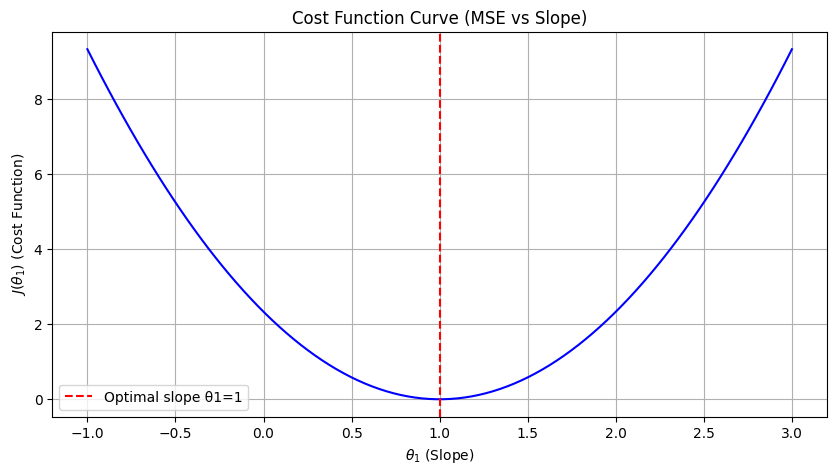

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample dataset (simple linear data)
X = np.array([1, 2, 3])
y = np.array([1, 2, 3])
m = len(y)

# Hypothesis function h(x) = theta1 * x (assuming theta0 = 0 for simplicity)
def hypothesis(theta1, X):
    return theta1 * X

# Cost function J(theta1)
def cost(theta1, X, y):
    return (1/(2*m)) * np.sum((hypothesis(theta1, X) - y) ** 2)

# Generate values of theta1 to test
theta1_vals = np.linspace(-1, 3, 100)
J_vals = [cost(t, X, y) for t in theta1_vals]

# Plot the cost function curve
plt.figure(figsize=(10,5))
plt.plot(theta1_vals, J_vals, color='blue')
plt.xlabel(r"$\theta_1$ (Slope)")
plt.ylabel(r"$J(\theta_1)$ (Cost Function)")
plt.title("Cost Function Curve (MSE vs Slope)")
plt.axvline(x=1, color='red', linestyle="--", label="Optimal slope θ1=1")
plt.legend()
plt.grid(True)
plt.show()



## Convergence Algorithm

The **convergence algorithm** is an iterative process used in **gradient descent** to update model parameters ($\theta_0, \theta_1, \dots$) until the **cost function** (error) reaches its **minimum value**.

In **linear regression**, convergence means reaching the **global minimum** of the cost function (Mean Squared Error), which gives us the **best-fit line**.

---

### The Update Rule (Core Formula)

$$
\theta_j := \theta_j - \alpha \cdot \frac{\partial J(\theta)}{\partial \theta_j}
$$

Where:

* $\theta_j$ → parameter (intercept, slope, etc.)
* $\alpha$ → learning rate (step size)
* $\frac{\partial J(\theta)}{\partial \theta_j}$ → derivative of cost function w\.r.t parameter (i.e., slope of the curve)

---

### Intuition Behind It

1. **Cost Function Curve** → looks like a bowl (U-shape).
2. **Derivative (Slope) tells direction**:

   * If slope is **positive** → decrease parameter.
   * If slope is **negative** → increase parameter.
3. By repeatedly adjusting parameters in the opposite direction of the slope, the algorithm **slides down the bowl** toward the **global minimum**.

---

### Role of Learning Rate ($\alpha$)

* Small $\alpha$ → tiny steps → slow convergence.
* Large $\alpha$ → big jumps → may overshoot, never converge.
* Balanced $\alpha$ → smooth, efficient convergence.

---

### When to Stop (Convergence Criteria)

We say the algorithm has **converged** when:

* The **change in cost function** between iterations is negligible (e.g., < 0.0001).
* Or, after a fixed number of iterations.

---

### Visual Intuition

* Imagine standing on a hill (cost function surface).
* Each step, you check the slope of the ground.
* Walk in the **downhill direction** with small, controlled steps.
* Eventually, you reach the **lowest valley** (global minimum).

---

✅ **In short:**
The convergence algorithm in gradient descent **optimizes parameters** by repeatedly moving them in the direction that reduces error, until the cost function cannot be minimized further.


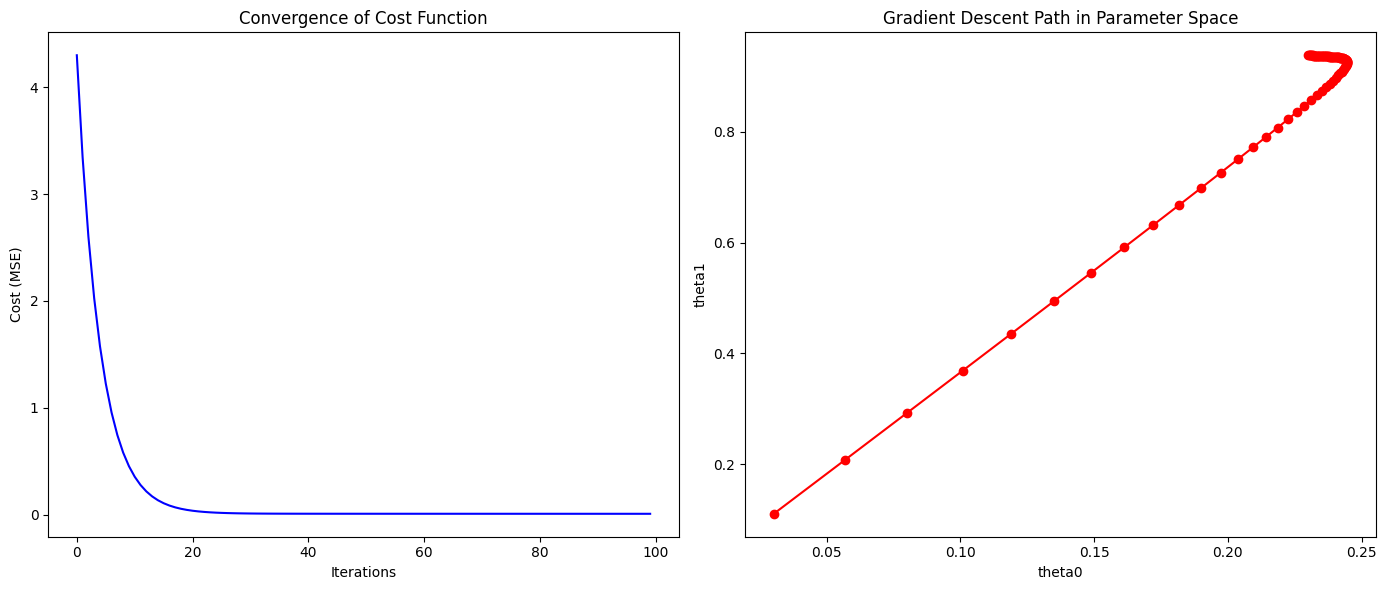

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create synthetic data
X = np.array([1, 2, 3, 4, 5])
y = np.array([1.2, 1.9, 3.0, 3.9, 5.1])
m = len(X)

# Initialize theta values
theta0, theta1 = 0.0, 0.0
alpha = 0.01
iterations = 100

# Store history
theta0_hist = []
theta1_hist = []
cost_hist = []

# Hypothesis function
def hypothesis(X, theta0, theta1):
    return theta0 + theta1 * X

# Cost function (MSE)
def compute_cost(X, y, theta0, theta1):
    predictions = hypothesis(X, theta0, theta1)
    errors = predictions - y
    return (1 / (2 * m)) * np.sum(errors ** 2)

# Gradient Descent
for _ in range(iterations):
    predictions = hypothesis(X, theta0, theta1)
    errors = predictions - y

    # Compute gradients
    d_theta0 = (1 / m) * np.sum(errors)
    d_theta1 = (1 / m) * np.sum(errors * X)

    # Update parameters
    theta0 -= alpha * d_theta0
    theta1 -= alpha * d_theta1

    # Record history
    theta0_hist.append(theta0)
    theta1_hist.append(theta1)
    cost_hist.append(compute_cost(X, y, theta0, theta1))

# Create figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot cost over iterations (convergence)
axs[0].plot(range(iterations), cost_hist, color='blue')
axs[0].set_title("Convergence of Cost Function")
axs[0].set_xlabel("Iterations")
axs[0].set_ylabel("Cost (MSE)")

# Plot gradient descent path in parameter space
axs[1].plot(theta0_hist, theta1_hist, marker='o', color='red')
axs[1].set_title("Gradient Descent Path in Parameter Space")
axs[1].set_xlabel("theta0")
axs[1].set_ylabel("theta1")

plt.tight_layout()
plt.show()


## Global Minima vs Local Minima

### Global Minima

* The **lowest possible point** of a cost function across the entire function domain.
* In optimization (like regression), reaching the **global minima** means we’ve found the **best solution**:

  * The cost (error) is the smallest possible.
  * Our model is optimally fitted to the data.

👉 Example: In linear regression, the cost function (MSE) is convex (U-shaped parabola or bowl).

* A convex function has **only one global minima**.
* That’s why gradient descent in linear regression always converges to the global minimum (if the learning rate is good).

---

### Local Minima

* Points where the function value is lower than nearby points, but **not the lowest overall**.
* Think of a “valley” in a mountain range — it’s lower than surrounding hills but not the deepest valley overall.

👉 Example: In more complex models (like neural networks), the cost surface may have **multiple local minima**.

* Gradient descent might get “stuck” in one of these valleys instead of reaching the global minimum.
* That’s why techniques like **momentum, Adam optimizer, random restarts** are used in deep learning.

---

### Visual Intuition

* Imagine a ball rolling downhill on a curve (cost function).
* If the curve is convex (parabola), it always reaches the global minima.
* If the curve has multiple dips, the ball may stop at a local minima instead of reaching the lowest global point.

---

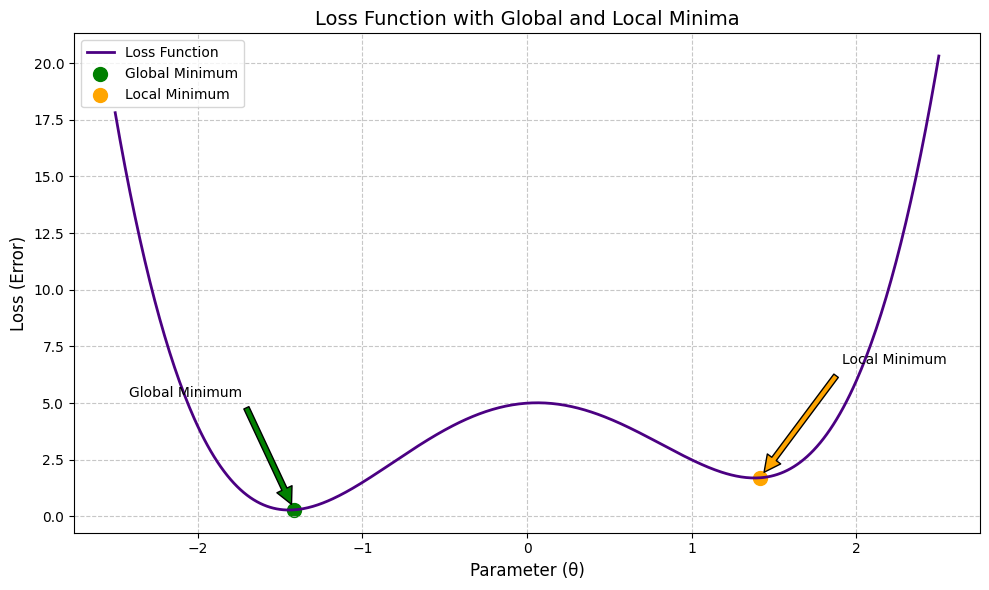

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the loss function: Loss(θ) = θ^4 - 4θ^2 + 0.5θ + 5
def loss_function(theta):
    return theta**4 - 4*theta**2 + 0.5*theta + 5

# Generate theta values
theta = np.arange(-2.5, 2.51, 0.01)
loss = loss_function(theta)

# Find approximate minima for annotation
global_min_theta = -1.414
global_min_loss = loss_function(global_min_theta)  # ≈ 2
local_min_theta = 1.414
local_min_loss = loss_function(local_min_theta)  # ≈ 4

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(theta, loss, label='Loss Function', color='indigo', linewidth=2)

# Mark global minimum
plt.scatter([global_min_theta], [global_min_loss], color='green', s=100, label='Global Minimum')
plt.annotate('Global Minimum', xy=(global_min_theta, global_min_loss), 
             xytext=(global_min_theta - 1, global_min_loss + 5),
             arrowprops=dict(facecolor='green', shrink=0.05))

# Mark local minimum
plt.scatter([local_min_theta], [local_min_loss], color='orange', s=100, label='Local Minimum')
plt.annotate('Local Minimum', xy=(local_min_theta, local_min_loss), 
             xytext=(local_min_theta + 0.5, local_min_loss + 5),
             arrowprops=dict(facecolor='orange', shrink=0.05))

# Customize the plot
plt.title('Loss Function with Global and Local Minima', fontsize=14)
plt.xlabel('Parameter (θ)', fontsize=12)
plt.ylabel('Loss (Error)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

## Gradient Descent

Gradient Descent is an optimization algorithm used to minimize a cost function by updating model parameters (θ). The types mainly differ in **how much data** they use at each update step.

---

## Types of Gradient Descent

### Batch Gradient Descent

* **Definition**: Uses the **entire training dataset** to compute the gradient of the cost function in each iteration.
* **Formula**:

  $$
  \theta := \theta - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} \nabla_\theta J(\theta; x^{(i)}, y^{(i)})
  $$

  where $m$ = number of training examples.
* **Pros**:

  * Converges to the **global minimum** for convex functions (like linear regression).
  * Stable updates.
* **Cons**:

  * Very slow for large datasets.
  * Requires huge memory since it must load all data at once.
* ✅ Best suited for **small to medium datasets**.

---

### Stochastic Gradient Descent (SGD)

* **Definition**: Updates parameters **for each training example** one at a time.
* **Formula**:

  $$
  \theta := \theta - \alpha \cdot \nabla_\theta J(\theta; x^{(i)}, y^{(i)})
  $$
* **Pros**:

  * Much faster (frequent updates).
  * Can escape **local minima** due to noisy updates.
* **Cons**:

  * Updates are noisy → cost function fluctuates rather than smoothly converging.
  * Harder to reach exact global minimum (oscillates around it).
* ✅ Best for **very large datasets** or **online learning**.

---

### Mini-Batch Gradient Descent

* **Definition**: A compromise between Batch and SGD. Uses **small random subsets (mini-batches)** of the data to update parameters.
* **Formula**:

  $$
  \theta := \theta - \alpha \cdot \frac{1}{b} \sum_{i=1}^{b} \nabla_\theta J(\theta; x^{(i)}, y^{(i)})
  $$

  where $b$ = mini-batch size (e.g., 32, 64, 128).
* **Pros**:

  * Faster and more efficient than pure Batch.
  * Less noisy than SGD.
  * Can leverage **vectorization** (parallel processing on GPUs).
* **Cons**:

  * Choosing batch size is tricky (too small → noisy, too large → slow).
* ✅ Best for **deep learning and neural networks**.

### Comparison Summary

| Type              | Update Frequency      | Speed            | Stability   | Use Case                        |
| ----------------- | --------------------- | ---------------- | ----------- | ------------------------------- |
| **Batch GD**      | After full dataset    | Slow             | Very stable | Small datasets                  |
| **Stochastic GD** | After each data point | Fast per step    | Noisy       | Large datasets, online learning |
| **Mini-Batch GD** | After subset (batch)  | Fast + efficient | Balanced    | Deep Learning                   |
